# Modelling Term-Structure Of Inetrest Rates

### Import Liabries

In [2]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

### Extrat Data

In [4]:
dayCountMapping = {'1 Mo': 30, '2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180, '1 Yr': 360, 
                   '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800, '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200, '30 Yr': 10800}
print(dayCountMapping)

{'1 Mo': 30, '2 Mo': 60, '3 Mo': 90, '4 Mo': 120, '6 Mo': 180, '1 Yr': 360, '2 Yr': 720, '3 Yr': 1080, '5 Yr': 1800, '7 Yr': 2520, '10 Yr': 3600, '20 Yr': 7200, '30 Yr': 10800}


In [5]:
class InterestRates:

    def __init__(self, Y):
        self.Y = Y

    def USTreasury(self, ratesCurve=False, COBDate=None):
        USTreasuryData = pd.read_csv(f'https://home.treasury.gov/resource-center/data-chart-center/interest-rates/daily-treasury-rates.csv/{self.Y}/all?type=daily_treasury_yield_curve&field_tdr_date_value={self.Y}&page&_format=csv', index_col='Date').iloc[::-1]  
        USTreasuryData.index = pd.to_datetime(USTreasuryData.index)
        
        if ratesCurve == True:
            if COBDate == None:
                return USTreasuryData[USTreasuryData.index == USTreasuryData.index.max()]
            else:
                return USTreasuryData[USTreasuryData.index == COBDate]
        else:
            return USTreasuryData

### Yield Curve

In [7]:
USTreasuryCurve = InterestRates(Y=2022).USTreasury(ratesCurve = True, COBDate = pd.to_datetime('2022-01-03'))
USTreasuryCurve

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


In [8]:
USTreasuryCurve_ = pd.DataFrame(data = USTreasuryCurve.values, index=USTreasuryCurve.index, columns=dayCountMapping.values())
USTreasuryCurve_

,30,60,90,120,180,360,720,1080,1800,2520,3600,7200,10800
Date,,,,,,,,,,,,,
2022-01-03,0.05,0.06,0.08,NaN,0.22,0.4,0.78,1.04,1.37,1.55,1.63,2.05,2.01


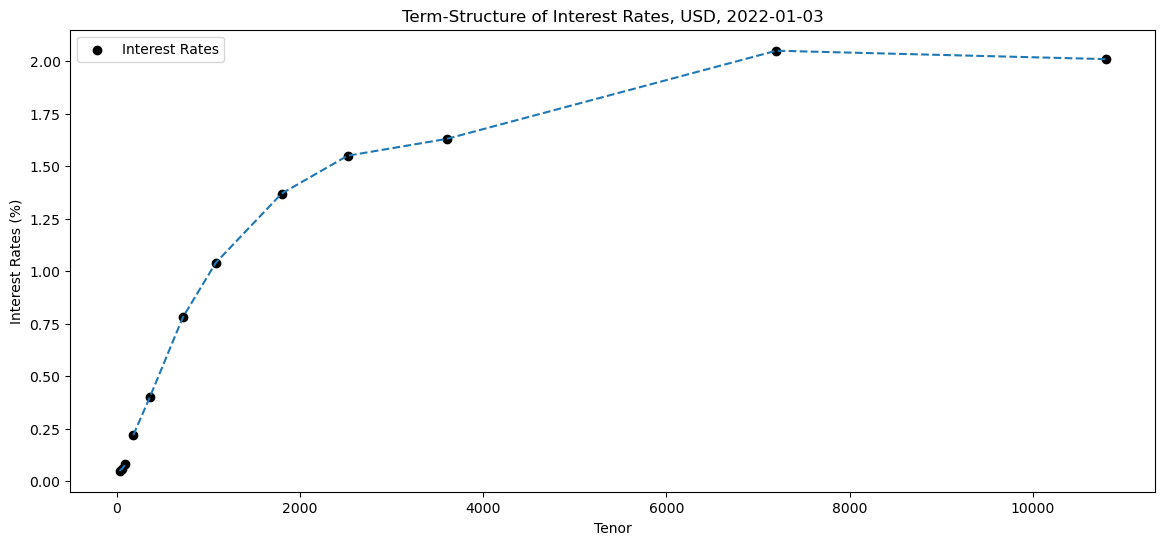

In [9]:
plt.figure(figsize=(14,6))
plt.scatter(x = USTreasuryCurve_.columns, y = USTreasuryCurve_.values, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_.transpose(), linestyle='--')
plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

## Regeression-Based Models

#### Ordinary Least Square (OLS) Method

          sum of squared residuls = summation (Y - Yhat)^2 
          (RSS -> Residual sum of Squares)

In [13]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [14]:
USTreasuryCurve_f=USTreasuryCurve_.dropna(axis='columns')
tenors = USTreasuryCurve_f.columns
intrestRates = USTreasuryCurve_f.values[0]
print(tenors,intrestRates)

Index([30, 60, 90, 180, 360, 720, 1080, 1800, 2520, 3600, 7200, 10800], dtype='int64') [0.05 0.06 0.08 0.22 0.4  0.78 1.04 1.37 1.55 1.63 2.05 2.01]


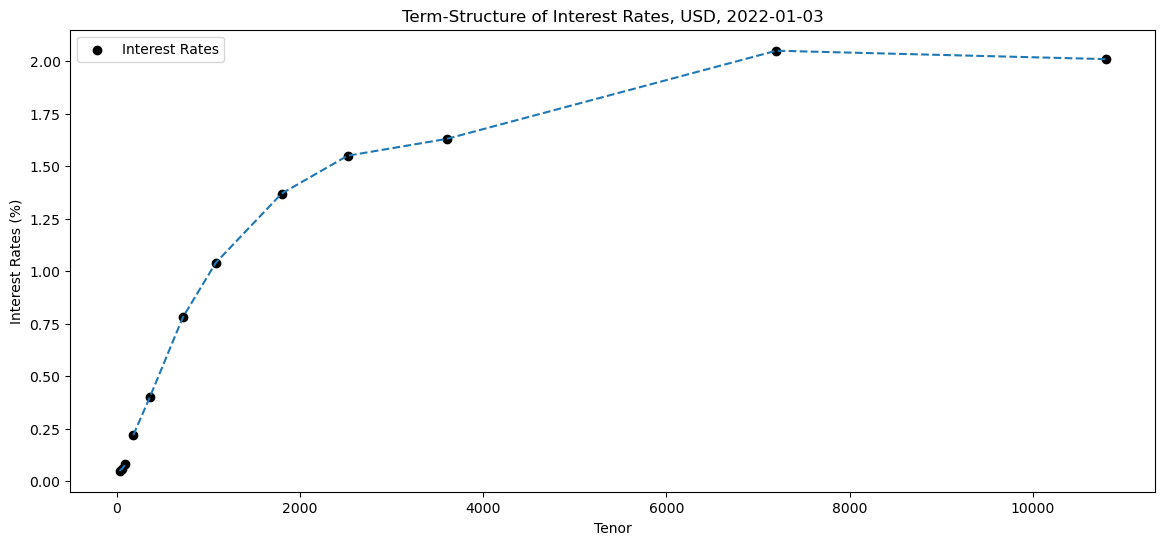

In [15]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_.transpose(), linestyle='--')
plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

### 01. Linear Regression

        Linear regression model: y=β0+β1⋅x+e
            β0 : is the coefficient of the intercept (constant term)
            β1 : is the coefficient of the first-order (linear term)
            e  : is the noise (error term)

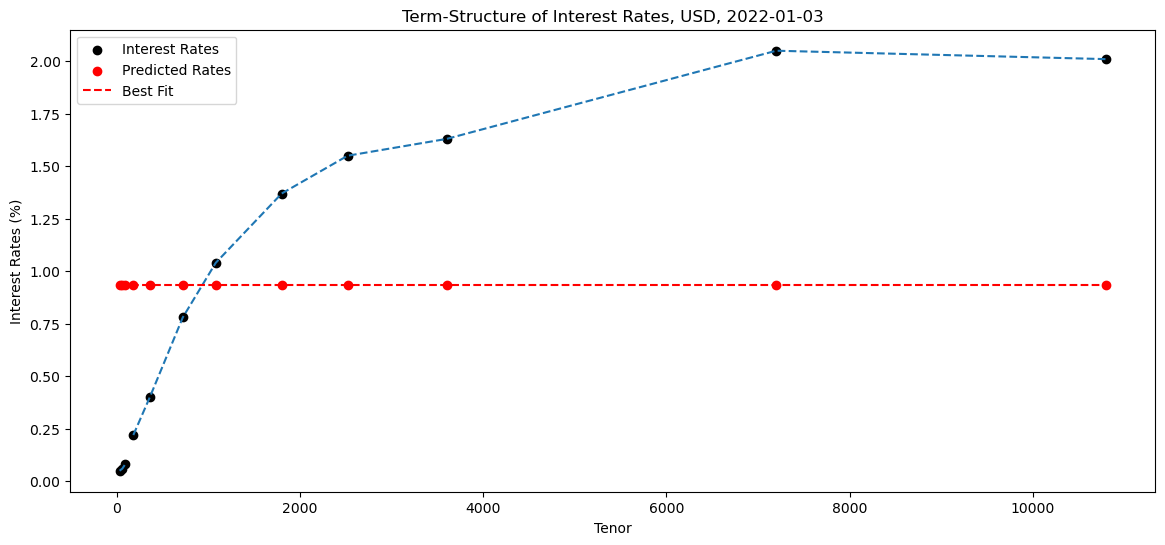

In [18]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_.transpose(), linestyle='--')

predictedRates = [intrestRates.mean()]*len(tenors)
plt.scatter(x=tenors, y=predictedRates, color='r', label='Predicted Rates')
plt.plot(tenors, predictedRates, color='r', linestyle='--', label='Best Fit')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [19]:
Ys = intrestRates
Yhats = [intrestRates.mean()]*len(tenors)
rss = sum((Y - Yhat)**2 for Y,Yhat in zip(Ys,Yhats))
print("Sum of Squared Residuals:",rss)

beta0, beta1 = Yhats[0],0.0
print('Coefficents:',{'beta0':beta0,'beta1':beta1})

predictedRate = beta0 + (beta1 *120) + 0.0
print("Predicted Rate: ",predictedRate)

Sum of Squared Residuals: 6.561666666666666
Coefficents: {'beta0': 0.9366666666666666, 'beta1': 0.0}
Predicted Rate:  0.9366666666666666


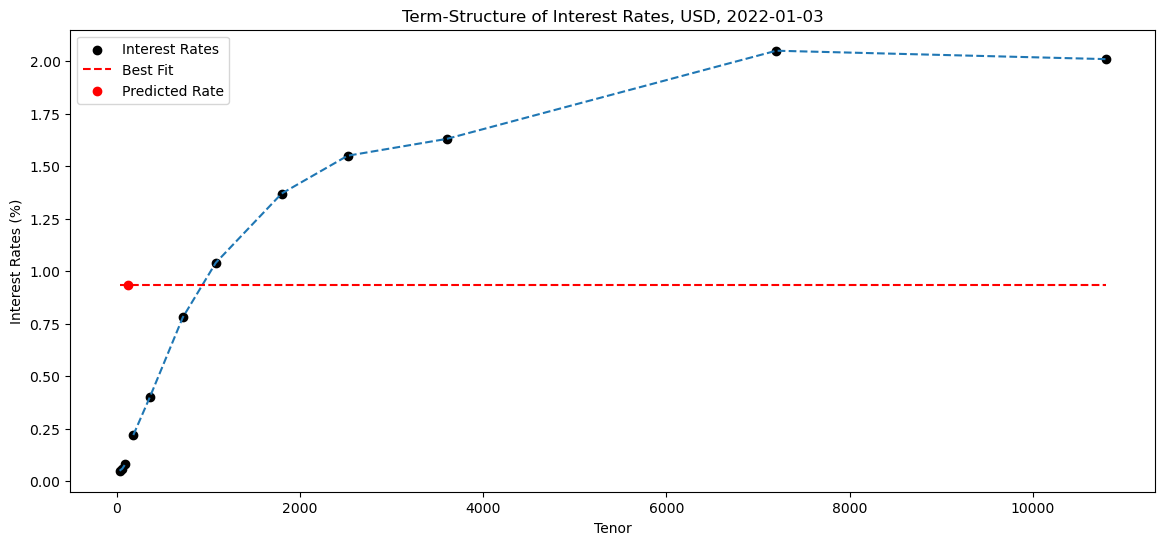

In [20]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(USTreasuryCurve_.transpose(), linestyle='--')

predictedRates = [intrestRates.mean()]*len(tenors)
# plt.scatter(x=tenors, y=predictedRates, color='r', label='Predicted Rates')
plt.plot(tenors, predictedRates, color='r', linestyle='--', label='Best Fit')
plt.scatter(120, predictedRate, color="r", label="Predicted Rate")

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [21]:
tenors,intrestRates = tenors / 360, intrestRates / 100
print(tenors,intrestRates)

Index([0.08333333333333333, 0.16666666666666666,                0.25,
                       0.5,                 1.0,                 2.0,
                       3.0,                 5.0,                 7.0,
                      10.0,                20.0,                30.0],
      dtype='float64') [0.0005 0.0006 0.0008 0.0022 0.004  0.0078 0.0104 0.0137 0.0155 0.0163
 0.0205 0.0201]


In [22]:
vanderMatrix =np.vander(tenors,increasing=True, N=2)
print(vanderMatrix)

[[ 1.          0.08333333]
 [ 1.          0.16666667]
 [ 1.          0.25      ]
 [ 1.          0.5       ]
 [ 1.          1.        ]
 [ 1.          2.        ]
 [ 1.          3.        ]
 [ 1.          5.        ]
 [ 1.          7.        ]
 [ 1.         10.        ]
 [ 1.         20.        ]
 [ 1.         30.        ]]


In [23]:
regressionFunction = sm.OLS(intrestRates,vanderMatrix).fit()
print(regressionFunction.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     22.96
Date:                Sun, 25 May 2025   Prob (F-statistic):           0.000733
Time:                        13:38:36   Log-Likelihood:                 49.013
No. Observations:                  12   AIC:                            -94.03
Df Residuals:                      10   BIC:                            -93.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0048      0.002      3.033      0.0

In [24]:
print('Coefficents: ',regressionFunction.params)

Coefficents:  [0.00484339 0.00068708]


In [25]:
print('Residuals: ',regressionFunction.resid)

Residuals:  [-0.00440065 -0.0043579  -0.00421516 -0.00298693 -0.00153047  0.00158245
  0.00349537  0.00542121  0.00584705  0.00458581  0.00191501 -0.0053558 ]


In [26]:
print('Sum of Squared Residuals: ',sum(regressionFunction.resid**2))

Sum of Squared Residuals:  0.0001990693498051591


In [27]:
estimatedRates = regressionFunction.predict(vanderMatrix)
print(estimatedRates)

[0.00490065 0.0049579  0.00501516 0.00518693 0.00553047 0.00621755
 0.00690463 0.00827879 0.00965295 0.01171419 0.01858499 0.0254558 ]


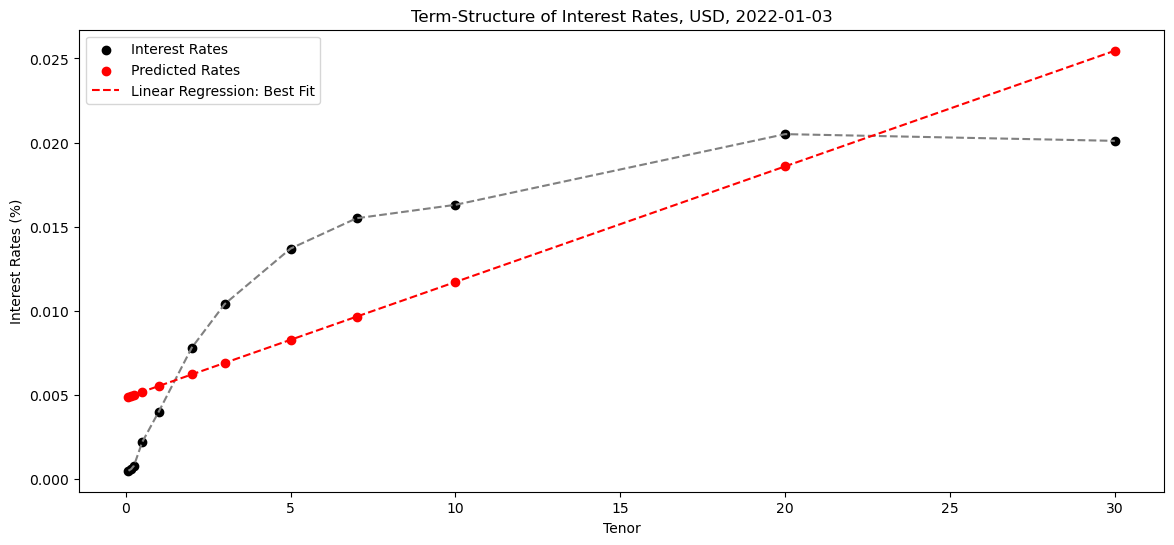

In [28]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(tenors,intrestRates,color='grey', linestyle='--')

plt.scatter(x=tenors, y=estimatedRates, color='r', label='Predicted Rates')
plt.plot(tenors, estimatedRates, color='r', linestyle='--', label='Linear Regression: Best Fit')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [29]:
tenorsPred = [0.3333, 4, 15, 25]
VanderMatrix = np.vander(tenorsPred, increasing=True, N=2)
predictedRates = regressionFunction.predict(VanderMatrix)
print(tenorsPred,predictedRates)

[0.3333, 4, 15, 25] [0.00507239 0.00759171 0.01514959 0.02202039]


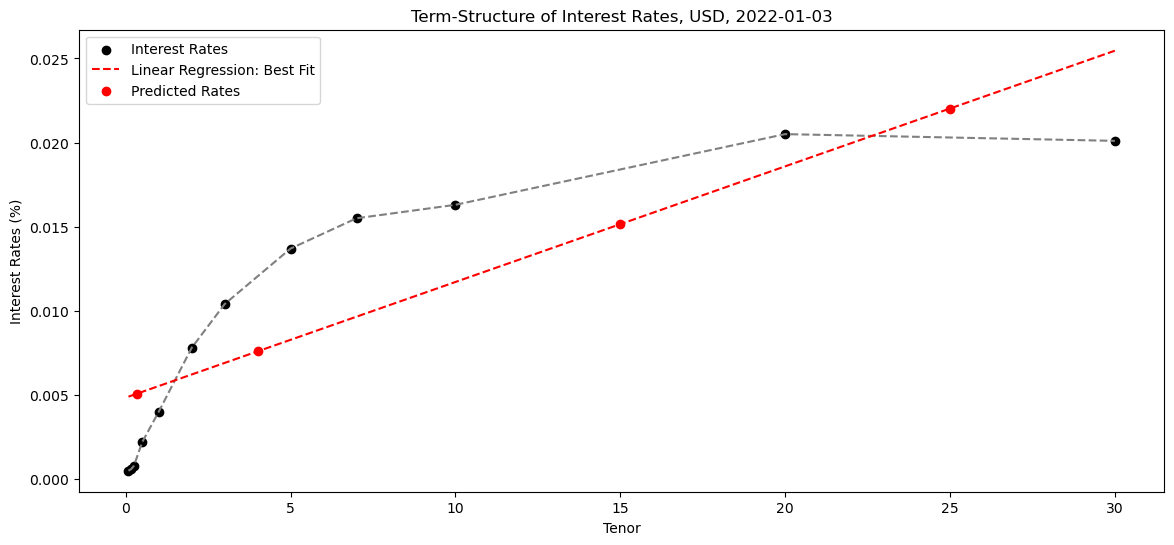

In [30]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(tenors, intrestRates, color='grey', linestyle='--')

plt.plot(tenors, estimatedRates, color='r', linestyle='--', label='Linear Regression: Best Fit')
plt.scatter(tenorsPred, predictedRates, color='r', label='Predicted Rates')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

### 02. Ploynomial Regerssion

        Quadratic Equation: y=β0 + β1⋅x + β2⋅x^2 + e
            β0 : is the coefficient of the Intercept (constant term)
            β1 : is the coefficient of the First-order (linear term)
            β2 : is the coefficient of the Second-order (quadritic term)
            e  : is the noise (error term)
            
        Cubic Equation: y=β0 + β1⋅x + β2⋅x^2 + β3⋅x^3 + e
            β0 : is the coefficient of the Intercept (constant term)
            β1 : is the coefficient of the First-order (linear term)
            β2 : is the coefficient of the Second-order (quadritic term)
            β3 : is the coefficient of the Third-order (cubic term)
            e  : is the noise (error term)
            
        Infinite series function: y = β0 + β1.x + β2.x^2 + β3.x^3 + ... + βn.x^n + e

In [56]:
print(tenors,intrestRates)

Index([0.08333333333333333, 0.16666666666666666,                0.25,
                       0.5,                 1.0,                 2.0,
                       3.0,                 5.0,                 7.0,
                      10.0,                20.0,                30.0],
      dtype='float64') [0.0005 0.0006 0.0008 0.0022 0.004  0.0078 0.0104 0.0137 0.0155 0.0163
 0.0205 0.0201]


In [58]:
vanderMatrix = np.vander(tenors, increasing=True, N=4)
print(vanderMatrix)

[[1.00000000e+00 8.33333333e-02 6.94444444e-03 5.78703704e-04]
 [1.00000000e+00 1.66666667e-01 2.77777778e-02 4.62962963e-03]
 [1.00000000e+00 2.50000000e-01 6.25000000e-02 1.56250000e-02]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e+02]
 [1.00000000e+00 1.00000000e+01 1.00000000e+02 1.00000000e+03]
 [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03]
 [1.00000000e+00 3.00000000e+01 9.00000000e+02 2.70000000e+04]]


In [62]:
regressionFunction = sm.OLS(intrestRates, vanderMatrix).fit()
print(regressionFunction.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     137.7
Date:                Sun, 25 May 2025   Prob (F-statistic):           3.18e-07
Time:                        13:53:56   Log-Likelihood:                 65.636
No. Observations:                  12   AIC:                            -123.3
Df Residuals:                       8   BIC:                            -121.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.344      0.2

In [64]:
print("Coefficents: ",regressionFunction.params)

Coefficents:  [ 8.00533775e-04  3.15976520e-03 -1.65796448e-04  2.73762952e-06]


In [70]:
print("Sum of Squared Residuals: ",sum(regressionFunction.resid**2))

Sum of Squared Residuals:  1.2467969265998036e-05


In [74]:
tenorsEst = np.linspace(0,30,31)
vanderMatrix = np.vander(tenorsEst, increasing=True, N=4)
estimatedRates = regressionFunction.predict(vanderMatrix)
print(tenorsEst,estimatedRates)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.] [0.00080053 0.00379724 0.00647878 0.00886158 0.01096206 0.01279665
 0.01438178 0.01573387 0.01686935 0.01780464 0.01855617 0.01914037
 0.01957365 0.01987245 0.0200532  0.02013231 0.02012622 0.02005134
 0.01992411 0.01976096 0.01957829 0.01939256 0.01922017 0.01907755
 0.01898113 0.01894734 0.01899261 0.01913335 0.01938599 0.01976696
 0.02029268]


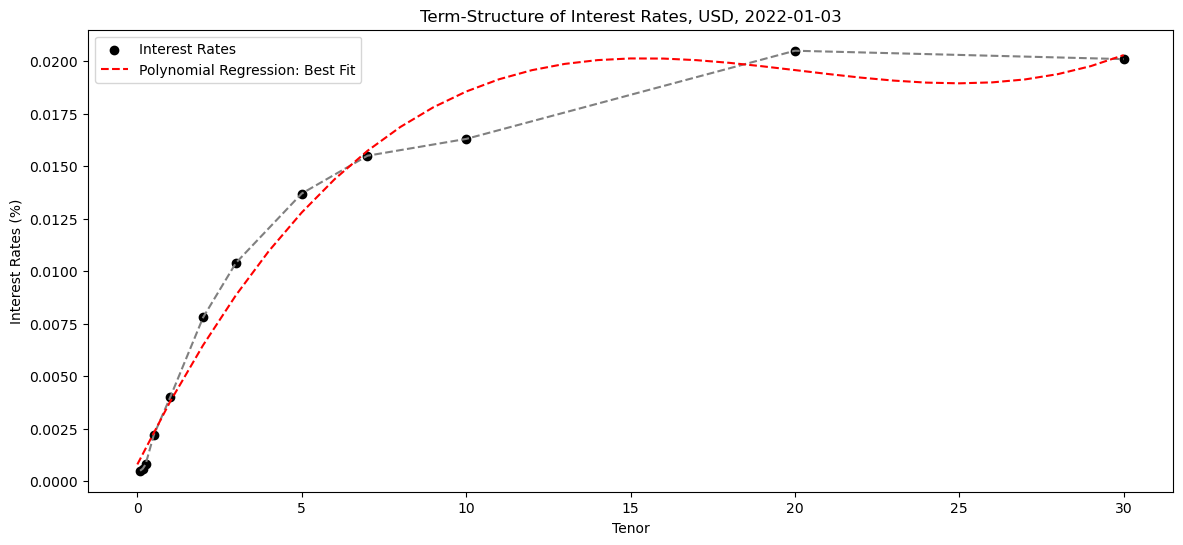

In [76]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(tenors, intrestRates, color='grey', linestyle='--')

plt.plot(tenorsEst, estimatedRates, color='r', linestyle='--', label='Polynomial Regression: Best Fit')
# plt.scatter(tenorsPred, predictedRates, color='r', label='Predicted Rates')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

In [78]:
tenorsPred = [0.3333, 4, 15, 25]
VanderMatrix = np.vander(tenorsPred, increasing=True, N=4)
predictedRates = regressionFunction.predict(VanderMatrix)
print(tenorsPred,predictedRates)

[0.3333, 4, 15, 25] [0.00183537 0.01096206 0.02013231 0.01894734]


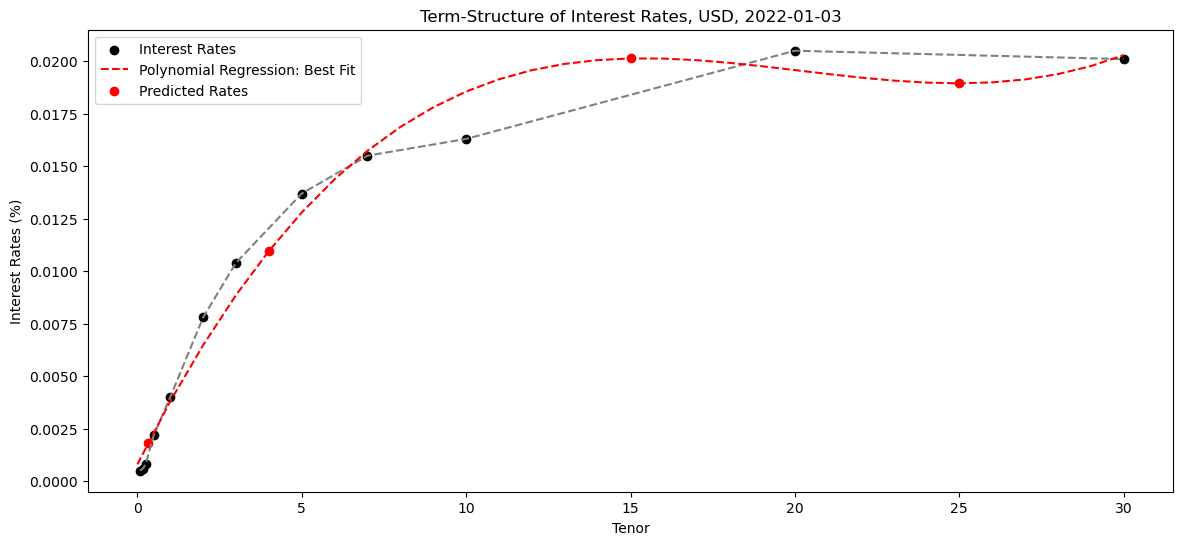

In [80]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(tenors, intrestRates, color='grey', linestyle='--')

plt.plot(tenorsEst, estimatedRates, color='r', linestyle='--', label='Polynomial Regression: Best Fit')
plt.scatter(tenorsPred, predictedRates, color='r', label='Predicted Rates')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()

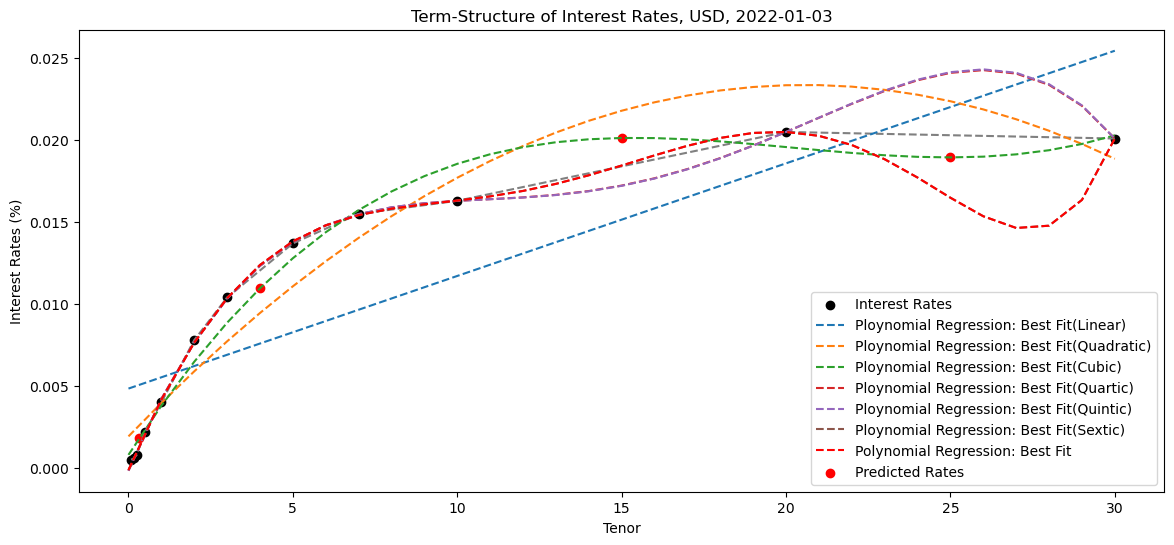

In [88]:
plt.figure(figsize=(14,6))
plt.scatter(x = tenors, y = intrestRates, color = 'k', label = 'Interest Rates')
plt.plot(tenors, intrestRates, color='grey', linestyle='--')

polyDegreeMapping = {1:'Linear', 2:'Quadratic', 3:'Cubic', 4:'Quartic', 5:'Quintic', 6:'Sextic', 7:'Septic', 8:'Octic', 9:'Nonic', 10:'Decic'}

for degree in range(1,7):
    vanderMatrix = np.vander(tenors,increasing=True, N=degree+1)
    regressionFunction = sm.OLS(intrestRates,vanderMatrix).fit()

    tenorsEst = np.linspace(0,30,31)
    vanderMatrix = np.vander(tenorsEst,increasing=True, N=degree+1)
    estimatedRates = regressionFunction.predict(vanderMatrix)
    plt.plot(tenorsEst,estimatedRates,linestyle="--",label=f"Ploynomial Regression: Best Fit({polyDegreeMapping[degree]})")

plt.plot(tenorsEst, estimatedRates, color='r', linestyle='--', label='Polynomial Regression: Best Fit')
plt.scatter(tenorsPred, predictedRates, color='r', label='Predicted Rates')

plt.title(f'Term-Structure of Interest Rates, USD, {USTreasuryCurve_.index[0].date()}')
plt.xlabel('Tenor')
plt.ylabel('Interest Rates (%)')
plt.legend()
plt.show()